# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import os

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

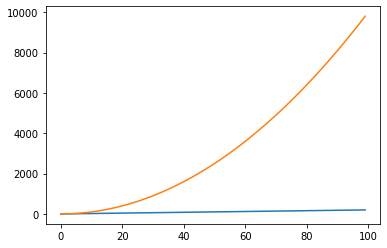

In [3]:
# Method 1
plt.plot(x,y)
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

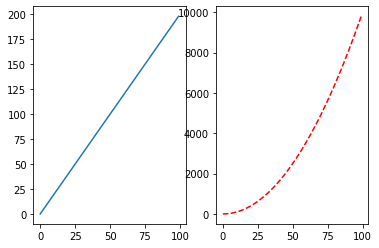

In [4]:
# Method 2
# subplot(nrows, ncols, index, **kwargs)

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(x, y)
ax2.plot(x,z, linestyle ='--', c = 'r')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

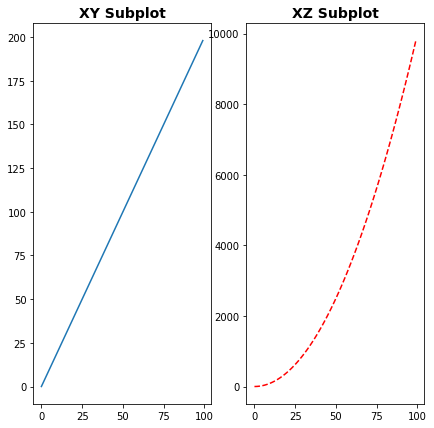

In [5]:
# your code here
# your code here
f, (ax1, ax2) = plt.subplots(1,2, figsize=(7,7))
ax1.plot(x, y)
ax1.set_title('XY Subplot', fontsize=14, fontweight='bold')
ax2.plot(x,z, linestyle ='--', c = 'r')
ax2.set_title('XZ Subplot', fontsize=14, fontweight='bold')


plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

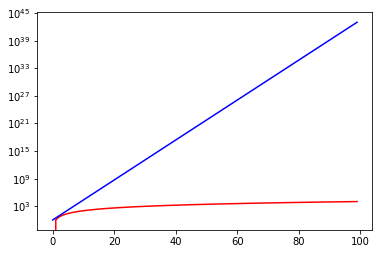

In [6]:
# your code here
import math as m
from matplotlib.ticker import FormatStrFormatter

a=x**2
b=(m.e)**x
plt.plot(x, a, 'r')
plt.plot(x, b, 'b') 
plt.yscale('log')

#### As a bonus challenge, try to add a legend to the plot.

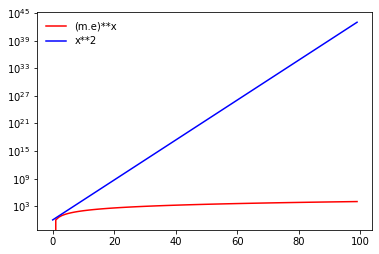

In [7]:
# your code here
a=x**2
b=(m.e)**x
plt.plot(x, a, 'r')
plt.plot(x, b, 'b') 
plt.yscale('log')
plt.legend(['(m.e)**x', 'x**2'], loc='upper left', frameon=False)

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fitbit = pd.read_csv("fitbit2.csv")
fitbit.head(2)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.0,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.4,92.086331,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

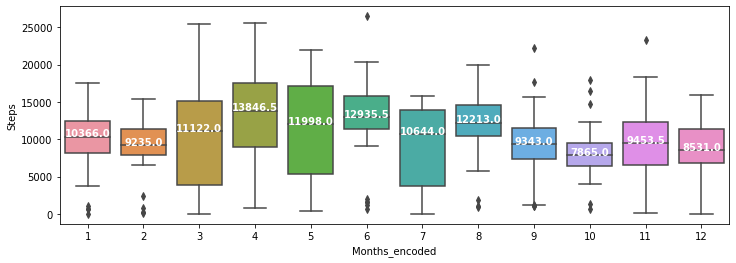

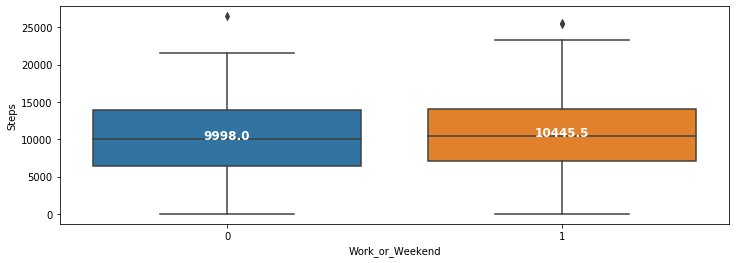

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
plt.figure(figsize=(12, 4))
ax = sb.boxplot(x='Months_encoded', y='Steps', data = fitbit)

medians = fitbit.groupby(['Months_encoded'])['Steps'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size=10, color='w', weight='semibold')
ax.figure.savefig('MyFigures/Months_encoded-medians.png')
    
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
plt.figure(figsize=(12, 4))
axx = sb.boxplot(x='Work_or_Weekend', y='Steps', data = fitbit)

medians = fitbit.groupby(['Work_or_Weekend'])['Steps'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,axx.get_xticklabels()):
    axx.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size=12, color='w', weight='semibold')
axx.figure.savefig('MyFigures/Work_or_Weekend-medians.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

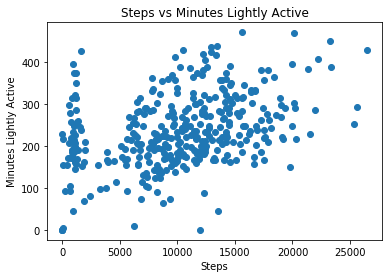

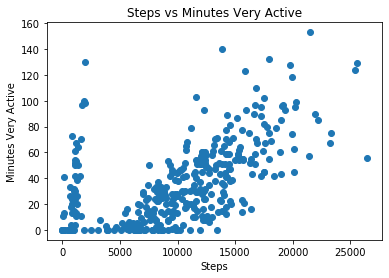

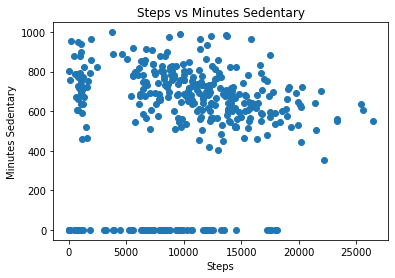

In [10]:
# your code here

x_variants = "Steps"
y_variants = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]


for y_variant in y_variants:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(fitbit[x_variants], fitbit[y_variant])
    ax.set_xlabel(x_variants)
    ax.set_ylabel(y_variant)
    ax.set_title("{} vs {}".format(x_variants, y_variant))
    plt.show()


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
# your code here
titanic = pd.read_csv("titanic.csv")
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### Explore the titanic dataset using Pandas dtypes.

In [12]:
# your code here
titanic.info()
titanic.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Gender         1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.879186,0.498854,0.385027,33.281086
std,378.020061,0.486592,0.837836,13.448335,1.041658,0.865560,51.741500
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes('number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [14]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object')


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [18]:
# your code here
print(plt.style.available)
plt.style.use('classic')
plt.figure(figsize=(12, 6))

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

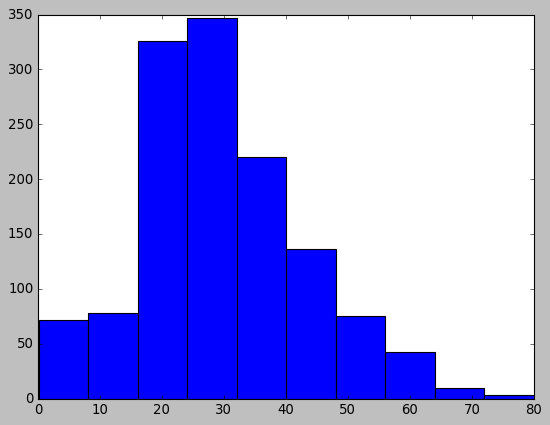

In [19]:
# your code here
age = plt.hist('Age', 10, facecolor= 'b', data=titanic)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

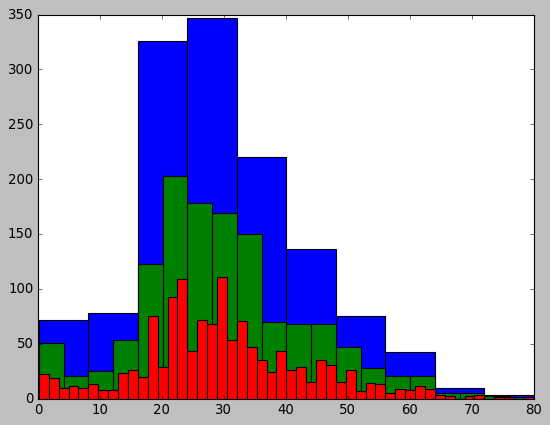

In [26]:
# your code here
plt.hist(titanic.Age, bins=10)
plt.hist(titanic.Age, bins=20)
plt.hist(titanic.Age, bins=50)

#### How does the bin size affect your plot?

In [25]:
"""
The distribution is closer to normal with larger bins, and becomes flatter as we decrease the bin size
"""

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

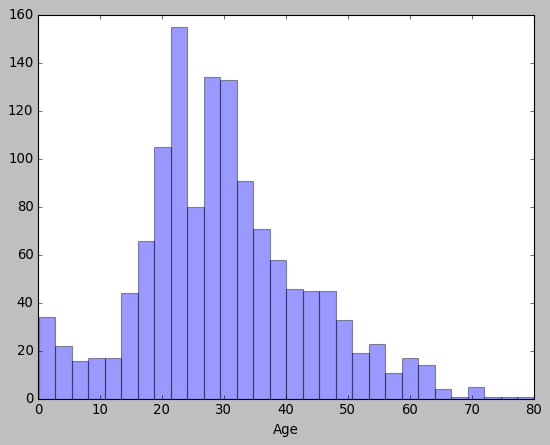

In [26]:
# your code here
sb.distplot(titanic['Age'], kde=False)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([843.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 466.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

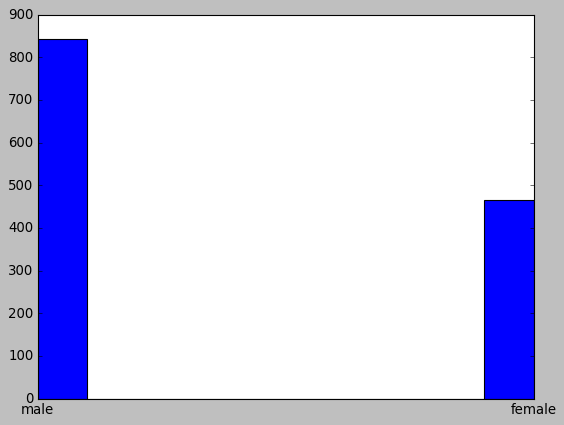

In [27]:
# Method 1 - matplotlib
# your code here
plt.hist('Gender', facecolor= 'b', data=titanic)

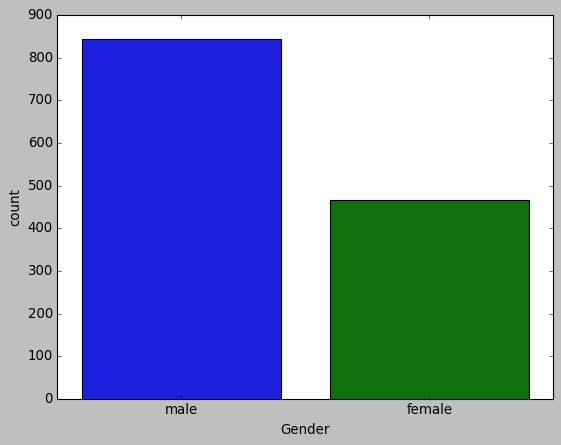

In [28]:
# Method 2 - seaborn
# your code here
sb.countplot(x="Gender", data=titanic)

#### Use the right plot to visualize the column `Pclass`.

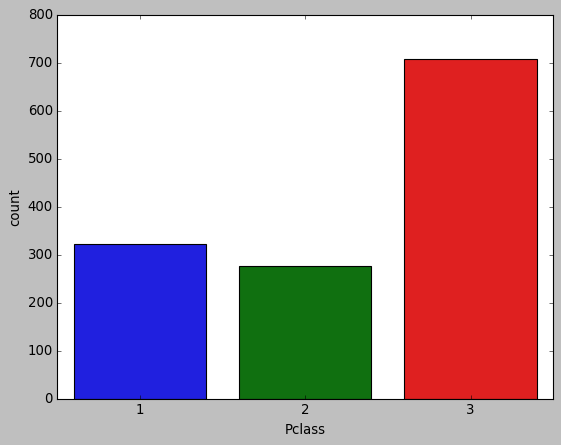

In [29]:
# your code here
sb.countplot(x="Pclass", data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

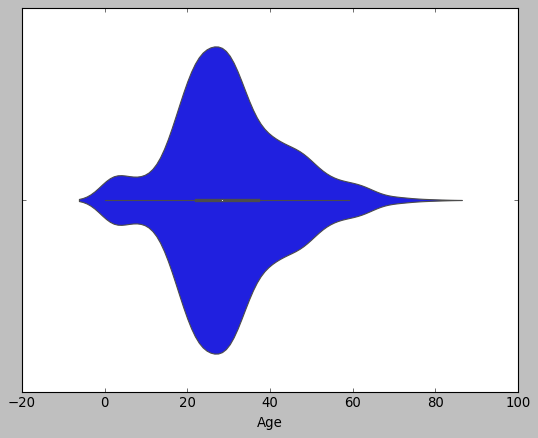

In [32]:
# your code here

sb.violinplot(titanic.Age)

#### What does the last plot tell you about the feature `Age`?

In [24]:
"""
We can see that the highest boarding class, in the case under the reference '1', is more common for older passengers.
That highest age concentration is from 20 to 50 years old, across all boarding classes.
Also that oldest passengers are predominantly male.
"""

"\nWe can see that the highest boarding class, in the case under the reference '1', is more common for older passengers.\nThat highest age concentration is from 20 to 50 years old, across all boarding classes.\nAlso that oldest passengers are predominantly male.\n"

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

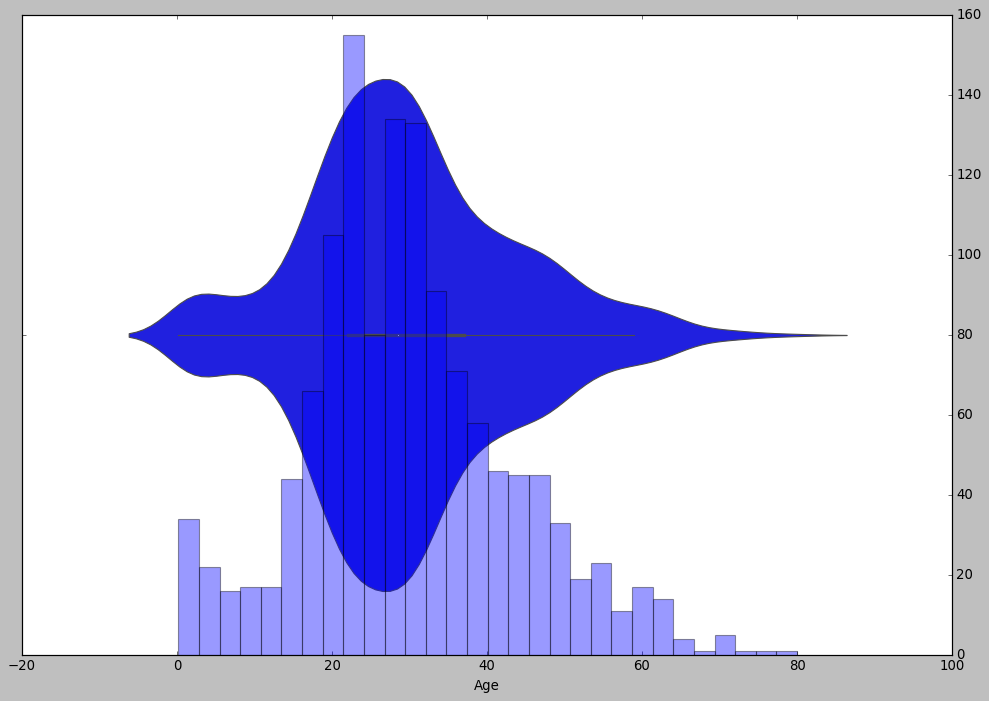

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
sb.violinplot(titanic.Age)
ax2 = ax.twinx()
sb.distplot(titanic['Age'], kde=False)

#### What additional information does the last plot provide about feature `Age`?

In [26]:
"""
It shows we have a clear higher density of passengers with ages between 20 and 40.
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

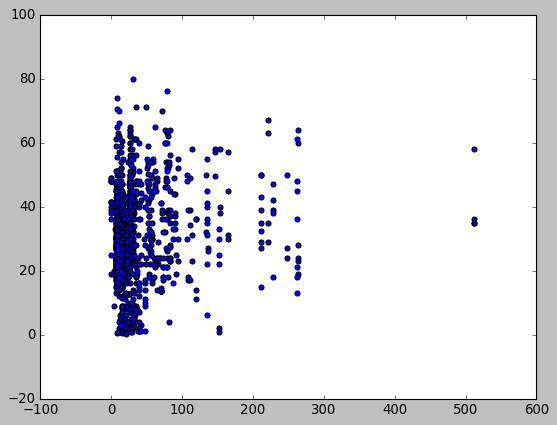

In [33]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic.Fare, titanic.Age)

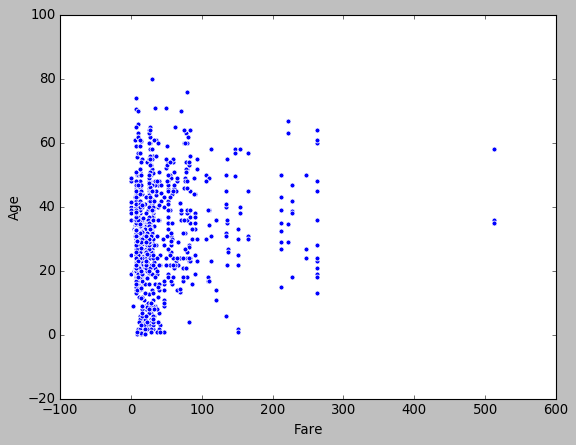

In [34]:
# Method 2 - seaborn
# your code here
sb.scatterplot(titanic.Fare, titanic.Age)

#### Plot the correlation matrix using seaborn.

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


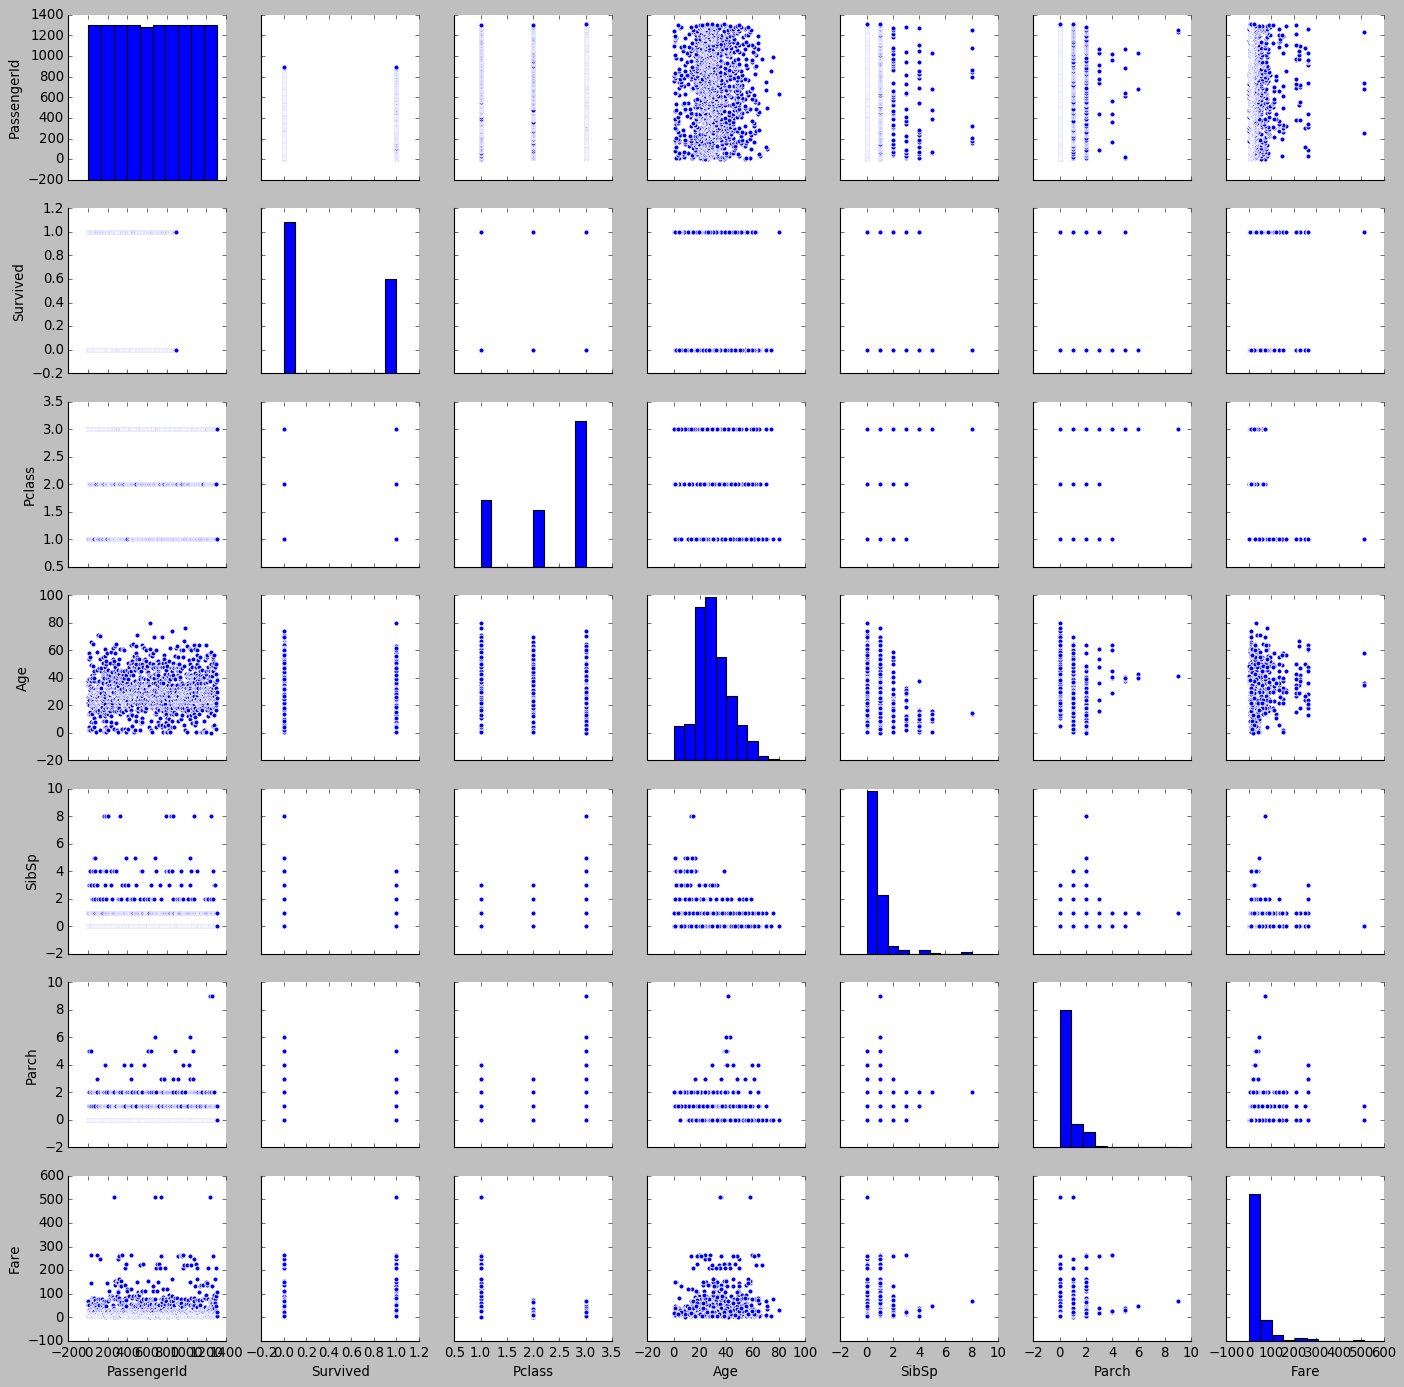

In [35]:
# your code here
sb.pairplot(titanic)

#### What are the most correlated features?

In [ ]:
"""
looking at the matrix above seems only Fare and Age are likely correlated
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

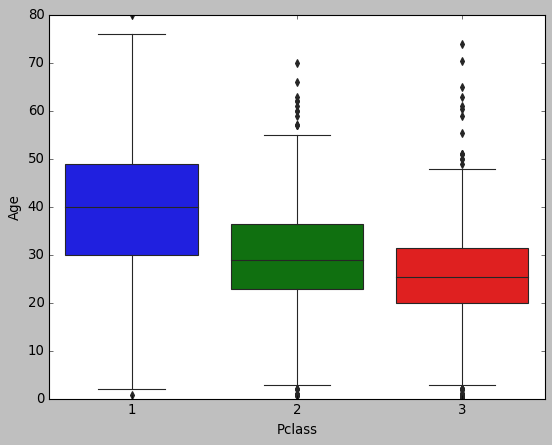

In [36]:
# your code here

sb.boxplot(titanic.Pclass, titanic.Age)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

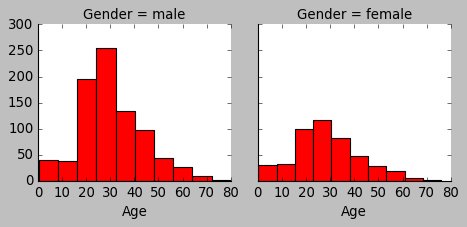

In [43]:
# your code here

genderfacet = sb.FacetGrid(titanic, col='Gender')
genderfacet.map(plt.hist, 'Age', facecolor= 'r')